# xarray library

From the [xarray Getting Started webpage](https://docs.xarray.dev/en/stable/getting-started-guide/why-xarray.html#what-labels-enable):

The N-dimensional nature of xarray’s data structures makes it suitable for dealing with multi-dimensional scientific data, and its use of dimension names instead of axis labels (dim='time' instead of axis=0) makes such arrays much more manageable than the raw numpy ndarray: with xarray, you don’t need to keep track of the order of an array’s dimensions or insert dummy dimensions of size 1 to align arrays (e.g., using np.newaxis).

The immediate payoff of using xarray is that you’ll write less code. The long-term payoff is that you’ll understand what you were thinking when you come back to look at it weeks or months later.

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from skimage.io import imread

## Quick Start

Here is how one could create a small 2D `xarray.DataArray` from a random numpy array, giving 2 dimension names (`x`, `y`) and a set of coordinates for the dimension `y`.

You can imagine these coordinates as being the real world positions of the array values, like, imagine `y` values represent temperatures at different altitudes in steps of 10 meters, starting from sea level. `x` can be something else, we did not specify here.

This will become more clear with the image example in the following section.

In [30]:
array = xr.DataArray(data=np.random.randn(2, 3), dims=("x", "y"), coords={"y": [0, 10, 20]})

In [31]:
array

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.76347946, -0.09819867,  1.33186694],
       [-0.59652051,  1.40705221, -0.23711062]])
Coordinates:
  * y        (y) int32 0 10 20
Dimensions without coordinates: x

## DataArray

Below we create a `DataArray` object containing an image loaded from disk.

### From numpy arrays to xarrays

Here we set some intial parameters (most of which are optional).

In [32]:
# Load image from disk as numpy array
blobs_np = imread('../data/blobs.tif')

# Dimensions
dims = ('y', 'x')

# Coordinates
pixel_resolution = (0.2, 0.2)

# provide dimension units later (see next cells)
coords = {'y': np.arange(blobs_np.shape[0]) * pixel_resolution[0],
          'x': np.arange(blobs_np.shape[1]) * pixel_resolution[1]}

# Name
name = 'blobs'

# Attributes
attrs = {'units': 'A.U.',
         'long_name': 'Intensity',
         }

Then, we can create a `DataArray` like this:

In [34]:
blobs_xr = xr.DataArray(blobs_np, dims=dims, coords=coords, name=name, attrs=attrs)
blobs_xr

<xarray.DataArray 'blobs' (y: 254, x: 256)>
array([[ 40,  32,  24, ..., 216, 200, 200],
       [ 56,  40,  24, ..., 232, 216, 216],
       [ 64,  48,  24, ..., 240, 232, 232],
       ...,
       [ 72,  80,  80, ...,  48,  48,  48],
       [ 80,  80,  80, ...,  48,  48,  48],
       [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)
Coordinates:
  * y        (y) float64 0.0 0.2 0.4 0.6 0.8 1.0 ... 49.8 50.0 50.2 50.4 50.6
  * x        (x) float64 0.0 0.2 0.4 0.6 0.8 1.0 ... 50.2 50.4 50.6 50.8 51.0
Attributes:
    units:      A.U.
    long_name:  Intensity

Here is a summary of the [DataArray parameters](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.html) that can be set upon a `DataArray` creation. Any extra metadata can be stored in the `attrs` parameter.

- `data` (array_like) – Values for this array. Must be an numpy.ndarray, ndarray like, or castable to an ndarray.

- `dims` (Hashable or sequence of Hashable, optional) – Name(s) of the data dimension(s).

- `coords` (sequence or dict of array_like, optional) – Coordinates (tick labels) to use for indexing along each dimension. 

- `name` (str or None, optional) – Name of this array.

- `attrs` (dict-like or None, optional) – Attributes to assign to the new instance. By default, an empty attribute dictionary is initialized. The `'units'` and `'long_name'` are special strings that describe what the values in the array represent and their units.

One can also add units to each of the axis, which are useful for plotting and calculations.

In [35]:
blobs_xr.x.attrs['units'] = 'um'
blobs_xr.y.attrs['units'] = 'um'

### Plotting

With the parameters set as above, plotting the image with proper axes names and units becomes straight-forward.

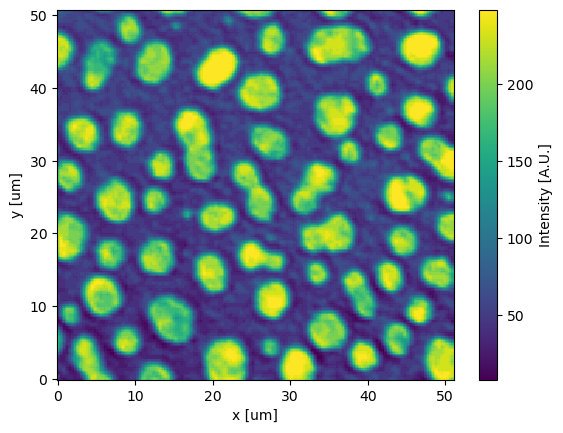

In [36]:
blobs_xr.plot()

### Indexing
We can index an `DataArray` with integer, just like `numpy`.

In [7]:
# positional and by integer label, like numpy
blobs_xr[1:5,1:5]

<xarray.DataArray 'blobs' (y: 4, x: 4)>
array([[40, 24, 24, 24],
       [48, 24, 32, 32],
       [40, 32, 40, 40],
       [24, 32, 40, 48]], dtype=uint8)
Coordinates:
  * y        (y) float64 0.2 0.4 0.6 0.8
  * x        (x) float64 0.2 0.4 0.6 0.8
Attributes:
    units:      A.U.
    long_name:  Intensity

Or with `.loc`, providing label values, similar to `pandas`. Notice that we do not need to be precise if the coords were defined.

In [11]:
# loc or "location": positional and coordinate label, like pandas (in case of non-existant locations, it approximates to the closest location)
blobs_xr.loc[0.2: 0.9823, 0.2: 0.8]

<xarray.DataArray 'blobs' (y: 4, x: 4)>
array([[40, 24, 24, 24],
       [48, 24, 32, 32],
       [40, 32, 40, 40],
       [24, 32, 40, 48]], dtype=uint8)
Coordinates:
  * y        (y) float64 0.2 0.4 0.6 0.8
  * x        (x) float64 0.2 0.4 0.6 0.8
Attributes:
    units:      A.U.
    long_name:  Intensity

`xarray` also has the `.isel` method, which can get specific rows/columns over dimensions previously defined by `dims`. In the example below, we get all `y` values for the third row (because indices start at 0).

In [37]:
# isel or "integer select":  by dimension name and integer label
blobs_xr.isel(x=2)

<xarray.DataArray 'blobs' (y: 254)>
array([ 24,  24,  24,  32,  32,  40,  48,  48,  48,  48,  40,  32,  24,
        24,  24,  24,  24,  40,  48,  64,  80,  96, 112, 120, 120, 128,
       136, 136, 136, 128, 120, 104,  88,  72,  56,  48,  32,  24,  16,
        24,  24,  40,  56,  80,  96,  96,  96,  96,  88,  80,  72,  64,
        48,  48,  40,  40,  40,  40,  40,  40,  32,  32,  32,  40,  40,
        40,  40,  40,  40,  40,  40,  48,  48,  48,  48,  48,  40,  32,
        24,  32,  40,  96, 144, 184, 224, 232, 232, 240, 240, 240, 240,
       248, 248, 248, 248, 248, 240, 240, 232, 224, 216, 216, 216, 216,
       216, 208, 200, 200, 192, 184, 176, 160, 144, 120,  96,  80,  56,
        48,  40,  40,  32,  40,  40,  40,  40,  32,  24,  24,  24,  32,
        40,  80, 112, 152, 192, 208, 216, 208, 200, 208, 208, 216, 216,
       208, 200, 184, 168, 160, 144, 128, 104,  88,  64,  56,  40,  40,
        40,  40,  40,  40,  32,  32,  24,  24,  24,  32,  32,  32,  32,
        40,  40,  48,  48,  48,  48,  56,  56,  56,  56,  56,  56,  56,
        48,  48,  48,  56,  56,  56,  48,  48,  48,  48,  40,  40,  40,
        48,  48,  48,  48,  48,  40,  40,  32,  40,  40,  48,  48,  48,
        48,  56,  56,  72,  80, 112, 144, 168, 184, 192, 200, 208, 216,
       224, 232, 232, 224, 224, 216, 216, 216, 224, 232, 232, 232, 232,
       232, 208, 184, 152, 112,  88,  64,  56,  40,  48,  48,  56,  64,
        64,  64,  72,  72,  80,  80,  80], dtype=uint8)
Coordinates:
  * y        (y) float64 0.0 0.2 0.4 0.6 0.8 1.0 ... 49.8 50.0 50.2 50.4 50.6
    x        float64 0.4
Attributes:
    units:      A.U.
    long_name:  Intensity

Here, we get the intersection of rows 1, 3 and 4 with columns 2, 3 and 4.

In [38]:
blobs_xr.isel(x=[1, 3, 4], y=[2, 3, 4])

<xarray.DataArray 'blobs' (y: 3, x: 3)>
array([[48, 32, 32],
       [40, 40, 40],
       [24, 40, 48]], dtype=uint8)
Coordinates:
  * y        (y) float64 0.4 0.6 0.8
  * x        (x) float64 0.2 0.6 0.8
Attributes:
    units:      A.U.
    long_name:  Intensity

Finally, there is also the `sel` method, where we now provide the coordinates of `x` and `y` direclty. 

In [39]:
# sel or "select": by dimension name and coordinate label
blobs_xr.sel(x=[0.2, 0.4], y=[0.4])

<xarray.DataArray 'blobs' (y: 1, x: 2)>
array([[48, 24]], dtype=uint8)
Coordinates:
  * y        (y) float64 0.4
  * x        (x) float64 0.2 0.4
Attributes:
    units:      A.U.
    long_name:  Intensity

The method `nearest` allow picking the nearest coordinates from the given values.

In [40]:
# sel or "select": by dimension name and coordinate label
blobs_xr.sel(x=[0.2, 0.4], y=[0.65, 0.75], method="nearest")

<xarray.DataArray 'blobs' (y: 2, x: 2)>
array([[40, 32],
       [24, 32]], dtype=uint8)
Coordinates:
  * y        (y) float64 0.6 0.8
  * x        (x) float64 0.2 0.4
Attributes:
    units:      A.U.
    long_name:  Intensity

### Computation
Globally summing a constant is easy.

In [41]:
blobs_xr + 10

<xarray.DataArray 'blobs' (y: 254, x: 256)>
array([[ 50,  42,  34, ..., 226, 210, 210],
       [ 66,  50,  34, ..., 242, 226, 226],
       [ 74,  58,  34, ..., 250, 242, 242],
       ...,
       [ 82,  90,  90, ...,  58,  58,  58],
       [ 90,  90,  90, ...,  58,  58,  58],
       [106,  98,  90, ...,  58,  58,  58]], dtype=uint8)
Coordinates:
  * y        (y) float64 0.0 0.2 0.4 0.6 0.8 1.0 ... 49.8 50.0 50.2 50.4 50.6
  * x        (x) float64 0.0 0.2 0.4 0.6 0.8 1.0 ... 50.2 50.4 50.6 50.8 51.0

Also, built-in functions common to numpy like `.sum` can be applied to the whole array.

In [14]:
blobs_xr.sum()

<xarray.DataArray 'blobs' ()>
array(6714936, dtype=uint32)

Or to a specific dimension (notice how `axis` is not needed here because the axes are labeled as `x` and `y` in this example).

In [43]:
blobs_xr.mean('x')

<xarray.DataArray 'blobs' (y: 254)>
array([105.34375, 107.78125, 107.21875, 108.65625, 106.8125 , 109.09375,
       108.625  , 111.625  , 111.78125, 113.40625, 111.8125 , 112.125  ,
       109.5    , 110.15625, 107.53125, 109.78125, 109.78125, 115.375  ,
       117.71875, 120.96875, 120.5625 , 121.9375 , 120.59375, 120.15625,
       117.1875 , 114.46875, 109.25   , 104.40625,  96.6875 ,  93.46875,
        87.0625 ,  86.8125 ,  83.6875 ,  84.71875,  82.375  ,  82.34375,
        79.40625,  78.625  ,  74.9375 ,  76.5625 ,  75.40625,  81.3125 ,
        84.21875,  92.125  ,  96.90625, 101.875  , 103.78125, 105.375  ,
       103.9375 , 104.25   , 101.21875, 101.40625,  98.59375,  98.15625,
        94.65625,  92.46875,  87.59375,  85.96875,  81.46875,  85.0625 ,
        85.53125,  91.03125,  93.46875,  99.40625, 102.0625 , 106.3125 ,
       107.9375 , 109.53125, 108.     , 107.65625, 103.84375, 103.8125 ,
       100.46875, 102.78125, 102.125  , 107.6875 , 110.15625, 115.5    ,
       117.46875, 117.90625, 115.15625, 114.625  , 111.3125 , 110.375  ,
       106.5    , 107.71875, 105.8125 , 108.96875, 109.5    , 113.5625 ,
       114.625  , 115.65625, 113.25   , 113.15625, 109.71875, 107.59375,
       102.625  , 101.875  ,  98.28125,  98.375  ,  96.28125,  98.9375 ,
        98.4375 ,  99.53125,  97.6875 ,  96.4375 ,  92.28125,  94.25   ,
        93.65625,  97.65625,  98.53125, 100.0625 ,  98.53125,  99.84375,
        98.375  , 104.125  , 106.96875, 110.6875 , 111.40625, 112.53125,
...
       107.5    , 110.65625, 110.46875, 111.40625, 109.75   , 110.1875 ,
       107.90625, 108.625  , 106.34375, 104.375  ,  99.375  ,  97.5625 ,
        92.59375,  94.     ,  92.8125 ,  94.4375 ,  93.0625 ,  95.375  ,
        94.9375 ,  99.90625, 102.15625, 108.03125, 110.78125, 114.5    ,
       115.625  , 117.21875, 116.09375, 117.46875, 115.46875, 117.0625 ,
       116.03125, 118.09375, 116.75   , 120.03125, 120.15625, 121.34375,
       119.53125, 119.15625, 115.59375, 114.34375, 110.28125, 108.4375 ,
       103.59375, 102.125  ,  97.6875 ,  97.875  ,  95.21875,  96.84375,
        95.25   ,  97.4375 ,  96.03125,  96.375  ,  94.3125 ,  93.53125,
        89.9375 ,  89.03125,  85.40625,  83.40625,  78.75   ,  80.03125,
        78.15625,  83.125  ,  84.96875,  91.09375,  94.25   , 100.5    ,
       103.0625 , 107.21875, 108.3125 , 108.90625, 106.4375 , 104.40625,
        99.84375,  98.6875 ,  94.625  ,  96.21875,  95.25   , 100.9375 ,
       103.65625, 112.375  , 117.96875, 123.1875 , 125.75   , 129.4375 ,
       130.28125, 134.15625, 134.84375, 138.125  , 138.3125 , 137.40625,
       133.8125 , 130.28125, 124.53125, 122.09375, 116.9375 , 115.25   ,
       110.65625, 108.96875, 104.9375 , 102.0625 ,  95.5625 ,  92.25   ,
        85.625  ,  81.8125 ,  75.03125,  70.96875,  63.625  ,  61.90625,
        57.0625 ,  60.90625,  61.21875,  70.9375 ,  77.84375,  86.84375,
        92.6875 , 101.375  ])
Coordinates:
  * y        (y) float64 0.0 0.2 0.4 0.6 0.8 1.0 ... 49.8 50.0 50.2 50.4 50.6

To get the numpy array back, we can use `.values`, `.data` or `np.asarray()`.

In [47]:
np.asarray(blobs_xr.mean('x'))

array([105.34375, 107.78125, 107.21875, 108.65625, 106.8125 , 109.09375,
       108.625  , 111.625  , 111.78125, 113.40625, 111.8125 , 112.125  ,
       109.5    , 110.15625, 107.53125, 109.78125, 109.78125, 115.375  ,
       117.71875, 120.96875, 120.5625 , 121.9375 , 120.59375, 120.15625,
       117.1875 , 114.46875, 109.25   , 104.40625,  96.6875 ,  93.46875,
        87.0625 ,  86.8125 ,  83.6875 ,  84.71875,  82.375  ,  82.34375,
        79.40625,  78.625  ,  74.9375 ,  76.5625 ,  75.40625,  81.3125 ,
        84.21875,  92.125  ,  96.90625, 101.875  , 103.78125, 105.375  ,
       103.9375 , 104.25   , 101.21875, 101.40625,  98.59375,  98.15625,
        94.65625,  92.46875,  87.59375,  85.96875,  81.46875,  85.0625 ,
        85.53125,  91.03125,  93.46875,  99.40625, 102.0625 , 106.3125 ,
       107.9375 , 109.53125, 108.     , 107.65625, 103.84375, 103.8125 ,
       100.46875, 102.78125, 102.125  , 107.6875 , 110.15625, 115.5    ,
       117.46875, 117.90625, 115.15625, 114.625  , 

In [48]:
# Doing this just gives the mean of the coordinates in the x axis.
blobs_xr.x.mean()

<xarray.DataArray 'x' ()>
array(25.5)

### Broadcasting
Multiplying arrays of different shape in cases where one want to broadcast.
Numpy raises a `ValueError` due to shape mismatch.

In [19]:
a = np.array([1, 2, 3])
b = np.array([0, 1, 2, 3])

a * b

ValueError: operands could not be broadcast together with shapes (3,) (4,) 

One could add a new axis to make it work.

In [72]:
a_reshaped = a[:, np.newaxis]
a_reshaped

array([[1],
       [2],
       [3]])

In [73]:
a_reshaped * b

array([[0, 1, 2, 3],
       [0, 2, 4, 6],
       [0, 3, 6, 9]])

Or use `np.outer`.

In [74]:
# Alternative to do it with numpy
np.outer(a, b)

array([[0, 1, 2, 3],
       [0, 2, 4, 6],
       [0, 3, 6, 9]])

For xarray, if the `dims` are not the same, it assumes broadcasting.

In [20]:
a = xr.DataArray(np.array([1, 2, 3]), dims="y", coords={"y": [10, 20, 30]})

b = xr.DataArray(np.array([0, 1, 2, 4]), dims="z")

a * b

<xarray.DataArray (y: 3, z: 4)>
array([[ 0,  1,  2,  4],
       [ 0,  2,  4,  8],
       [ 0,  3,  6, 12]])
Coordinates:
  * y        (y) int32 10 20 30
Dimensions without coordinates: z

### pandas DataFrames to xarrays

Here we read a `.csv` file with `pandas`.

In [22]:
table = pd.read_csv('../data/blobs_statistics.csv')
table.head()

,label,area,mean_intensity,minor_axis_length,major_axis_length,eccentricity,extent,feret_diameter_max,equivalent_diameter_area,bbox-0,bbox-1,bbox-2,bbox-3,group
0,1,422,192.379147,16.488550,34.566789,0.878900,0.586111,35.227830,23.179885,0,11,30,35,3
1,2,182,180.131868,11.736074,20.802697,0.825665,0.787879,21.377558,15.222667,0,53,11,74,2
2,3,661,205.216339,28.409502,30.208433,0.339934,0.874339,32.756679,29.010538,0,95,28,122,3
3,4,437,216.585812,23.143996,24.606130,0.339576,0.826087,26.925824,23.588253,0,144,23,167,3
4,5,476,212.302521,19.852882,31.075106,0.769317,0.863884,31.384710,24.618327,0,237,29,256,3


We can use the `.to_xarray()` method or `xarray.Dataset.from_dataframe()` to convert the `pandas.DataFrame` to a `xarray.Dataset`.

The index becomes the coordinates and all columns become data variables.

In [25]:
# ds = xr.Dataset.from_dataframe(table)

# or

ds = table.to_xarray()
ds

<xarray.Dataset>
Dimensions:                   (index: 61)
Coordinates:
  * index                     (index) int64 0 1 2 3 4 5 6 ... 55 56 57 58 59 60
Data variables: (12/14)
    label                     (index) int64 1 2 3 4 5 6 7 ... 56 57 58 59 60 61
    area                      (index) int64 422 182 661 437 476 ... 78 86 51 46
    mean_intensity            (index) float64 192.4 180.1 205.2 ... 190.4 175.3
    minor_axis_length         (index) float64 16.49 11.74 28.41 ... 5.032 3.804
    major_axis_length         (index) float64 34.57 20.8 30.21 ... 13.74 15.95
    eccentricity              (index) float64 0.8789 0.8257 ... 0.9305 0.9711
    ...                        ...
    equivalent_diameter_area  (index) float64 23.18 15.22 29.01 ... 8.058 7.653
    bbox-0                    (index) int64 0 0 0 0 0 6 ... 232 248 249 249 250
    bbox-1                    (index) int64 11 53 95 144 237 ... 170 117 228 67
    bbox-2                    (index) int64 30 11 28 23 29 ... 254 254 254 254
    bbox-3                    (index) int64 35 74 122 167 256 ... 188 139 242 82
    group                     (index) int64 3 2 3 3 3 2 2 2 ... 3 3 2 2 1 1 1 1

If we set some categorical columns to index, indexing becomes easier afterwards. We can do that with `.set_index` as shown below.

In [26]:
ds = ds.set_index(index=('label', 'group'))
ds

<xarray.Dataset>
Dimensions:                   (index: 61)
Coordinates:
  * index                     (index) object MultiIndex
  * label                     (index) int64 1 2 3 4 5 6 7 ... 56 57 58 59 60 61
  * group                     (index) int64 3 2 3 3 3 2 2 2 ... 3 3 2 2 1 1 1 1
Data variables:
    area                      (index) int64 422 182 661 437 476 ... 78 86 51 46
    mean_intensity            (index) float64 192.4 180.1 205.2 ... 190.4 175.3
    minor_axis_length         (index) float64 16.49 11.74 28.41 ... 5.032 3.804
    major_axis_length         (index) float64 34.57 20.8 30.21 ... 13.74 15.95
    eccentricity              (index) float64 0.8789 0.8257 ... 0.9305 0.9711
    extent                    (index) float64 0.5861 0.7879 ... 0.7286 0.7667
    feret_diameter_max        (index) float64 35.23 21.38 32.76 ... 14.04 15.03
    equivalent_diameter_area  (index) float64 23.18 15.22 29.01 ... 8.058 7.653
    bbox-0                    (index) int64 0 0 0 0 0 6 ... 232 248 249 249 250
    bbox-1                    (index) int64 11 53 95 144 237 ... 170 117 228 67
    bbox-2                    (index) int64 30 11 28 23 29 ... 254 254 254 254
    bbox-3                    (index) int64 35 74 122 167 256 ... 188 139 242 82

### Indexing
In pandas, we could filter data by providing a mask.

In [27]:
group1_mask = table['group'] == 1
table[group1_mask]

,label,area,mean_intensity,minor_axis_length,major_axis_length,eccentricity,extent,feret_diameter_max,equivalent_diameter_area,bbox-0,bbox-1,bbox-2,bbox-3,group
8,9,67,167.522388,8.731268,9.761752,0.447195,0.827160,10.295630,9.236182,18,133,27,142,1
9,10,19,155.368421,1.967201,11.358057,0.984887,0.863636,11.000000,4.918491,21,0,32,2,1
13,14,78,173.128205,8.701499,11.377331,0.644256,0.787879,11.704700,9.965575,40,4,51,13,1
34,35,5,161.600000,1.788854,3.098387,0.816497,0.833333,3.162278,2.523133,125,252,127,255,1
47,48,64,190.250000,5.354655,15.925594,0.941780,0.800000,16.031220,9.027033,193,251,209,256,1
57,58,78,185.230769,6.028638,17.579799,0.939361,0.722222,18.027756,9.965575,248,170,254,188,1
58,59,86,183.720930,5.426871,21.261427,0.966876,0.781818,22.000000,10.464158,249,117,254,139,1
59,60,51,190.431373,5.032414,13.742079,0.930534,0.728571,14.035669,8.058239,249,228,254,242,1
60,61,46,175.304348,3.803982,15.948714,0.971139,0.766667,15.033296,7.653040,250,67,254,82,1


With xarray, we can specify the corresponding index value.

In [28]:
ds.sel(group=1)

<xarray.Dataset>
Dimensions:                   (label: 9)
Coordinates:
  * label                     (label) int64 9 10 14 35 48 58 59 60 61
    group                     int32 1
Data variables:
    area                      (label) int64 67 19 78 5 64 78 86 51 46
    mean_intensity            (label) float64 167.5 155.4 173.1 ... 190.4 175.3
    minor_axis_length         (label) float64 8.731 1.967 8.701 ... 5.032 3.804
    major_axis_length         (label) float64 9.762 11.36 11.38 ... 13.74 15.95
    eccentricity              (label) float64 0.4472 0.9849 ... 0.9305 0.9711
    extent                    (label) float64 0.8272 0.8636 ... 0.7286 0.7667
    feret_diameter_max        (label) float64 10.3 11.0 11.7 ... 14.04 15.03
    equivalent_diameter_area  (label) float64 9.236 4.918 9.966 ... 8.058 7.653
    bbox-0                    (label) int64 18 21 40 125 193 248 249 249 250
    bbox-1                    (label) int64 133 0 4 252 251 170 117 228 67
    bbox-2                    (label) int64 27 32 51 127 209 254 254 254 254
    bbox-3                    (label) int64 142 2 13 255 256 188 139 242 82

And apply functions to it, like this:

In [29]:
ds.sel(group=1).area.mean()

<xarray.DataArray 'area' ()>
array(54.88888889)
Coordinates:
    group    int32 1

## `DataArray` and `Dataset`

Some differences from `DataArray` and `Dataset` from the [xarray documentation on Working with pandas](https://docs.xarray.dev/en/stable/user-guide/pandas.html#transitioning-from-pandas-panel-to-xarray):

...there are two primary data structures in xarray: `DataArray` and `Dataset`. You can imagine a `DataArray` as a n-dimensional `pandas Series` (i.e. a single typed array), and a `Dataset` as the `DataFrame` equivalent (i.e. a dict of aligned `DataArray` objects).

So you can represent a Panel (multi-dimensional tables), in two ways:

- As a 3-dimensional `DataArray`,

- Or as a `Dataset` containing a number of 2-dimensional `DataArray` objects.